In [36]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
fs = 1000
T = 1
t = np.linspace(0, T, fs, endpoint=False)

In [38]:
f = 5
signal_clean = np.sin(2 * np.pi * f * t)
noise = 0.5 * np.random.randn(len(t))
signal_noisy = signal_clean + noise

FIR Filter

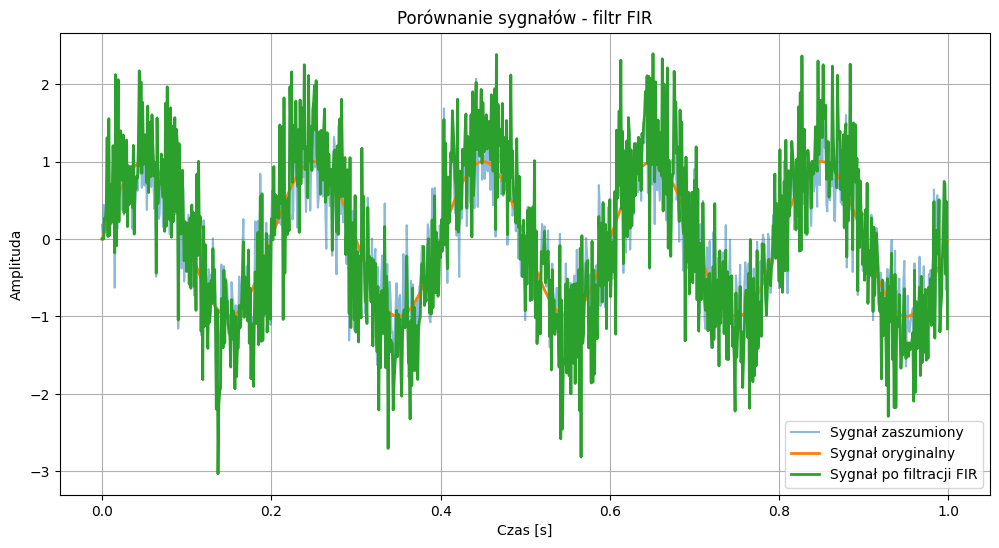

In [39]:
def fir_filter(x, b):
    M = len(b)
    y = np.zeros(len(x))
    for n in range(M, len(x)):
        y[n] = np.dot(b, x[n-M+1:n+1][::-1])
    return y

# Współczynniki dla wariantu 11
b_fir = np.array([1, -0.2, 0.5])

signal_fir = fir_filter(signal_noisy, b_fir)
plt.figure(figsize=(12, 6))
plt.plot(t, signal_noisy, label='Sygnał zaszumiony', alpha=0.5)
plt.plot(t, signal_clean, label='Sygnał oryginalny', linewidth=2)
plt.plot(t, signal_fir, label='Sygnał po filtracji FIR', linewidth=2)
plt.title('Porównanie sygnałów - filtr FIR')
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda')
plt.legend()
plt.grid()
plt.show()

IIR Filter

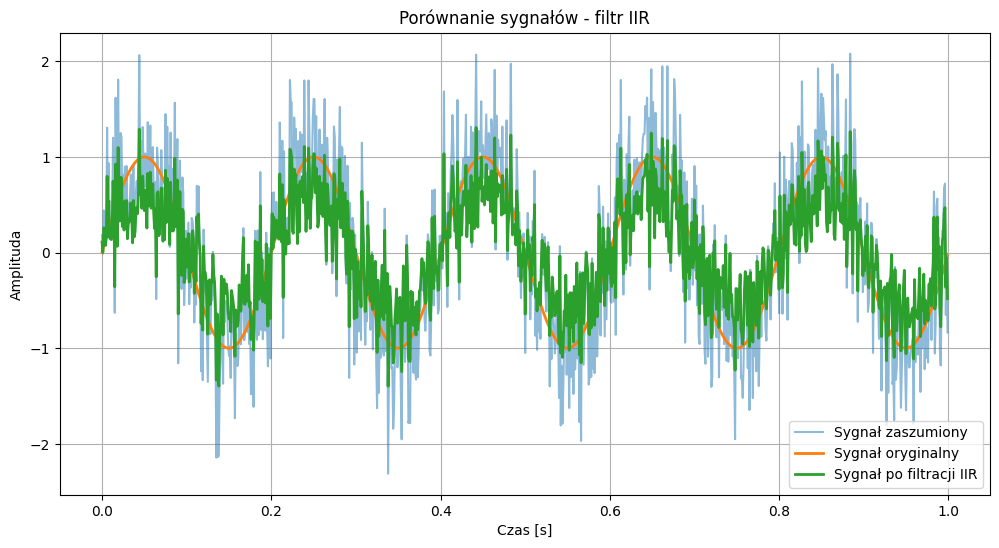

In [40]:
def iir_filter(x, b, a):
    M = len(b)
    N = len(a)
    y = np.zeros(len(x))

    for n in range(len(x)):
        x_segment = x[max(0, n-M+1):n+1][::-1]
        y[n] = np.dot(b[:len(x_segment)], x_segment)

        if n > 0:
            y_segment = y[max(0, n-N+1):n][::-1]
            y[n] -= np.dot(a[1:len(y_segment)+1], y_segment)

    return y

b_iir = np.array([0.6, 0.3])
a_iir = np.array([1, 0.4])

signal_iir = iir_filter(signal_noisy, b_iir, a_iir)

plt.figure(figsize=(12, 6))
plt.plot(t, signal_noisy, label='Sygnał zaszumiony', alpha=0.5)
plt.plot(t, signal_clean, label='Sygnał oryginalny', linewidth=2)
plt.plot(t, signal_iir, label='Sygnał po filtracji IIR', linewidth=2)
plt.title('Porównanie sygnałów - filtr IIR')
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda')
plt.legend()
plt.grid()
plt.show()

LMS Filter

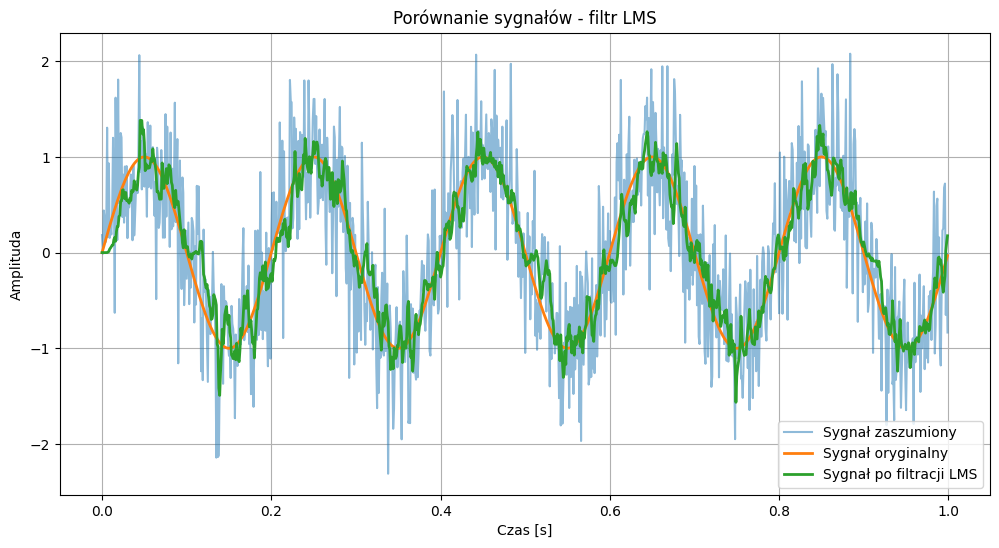

In [41]:
def lms_filter(x, d, mu, num_taps):
    n = len(x)
    w = np.zeros(num_taps)
    y = np.zeros(n)
    e = np.zeros(n)

    for i in range(num_taps, n):
        x_segment = x[i-num_taps:i][::-1]
        y[i] = np.dot(w, x_segment)
        e[i] = d[i] - y[i]
        w += mu * e[i] * x_segment

    return y, e, w

mu_lms = 0.05
num_taps = 6


signal_lms, error_lms, weights_lms = lms_filter(signal_noisy, signal_clean, mu_lms, num_taps)

plt.figure(figsize=(12, 6))
plt.plot(t, signal_noisy, label='Sygnał zaszumiony', alpha=0.5)
plt.plot(t, signal_clean, label='Sygnał oryginalny', linewidth=2)
plt.plot(t, signal_lms, label='Sygnał po filtracji LMS', linewidth=2)
plt.title('Porównanie sygnałów - filtr LMS')
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda')
plt.legend()
plt.grid()
plt.show()

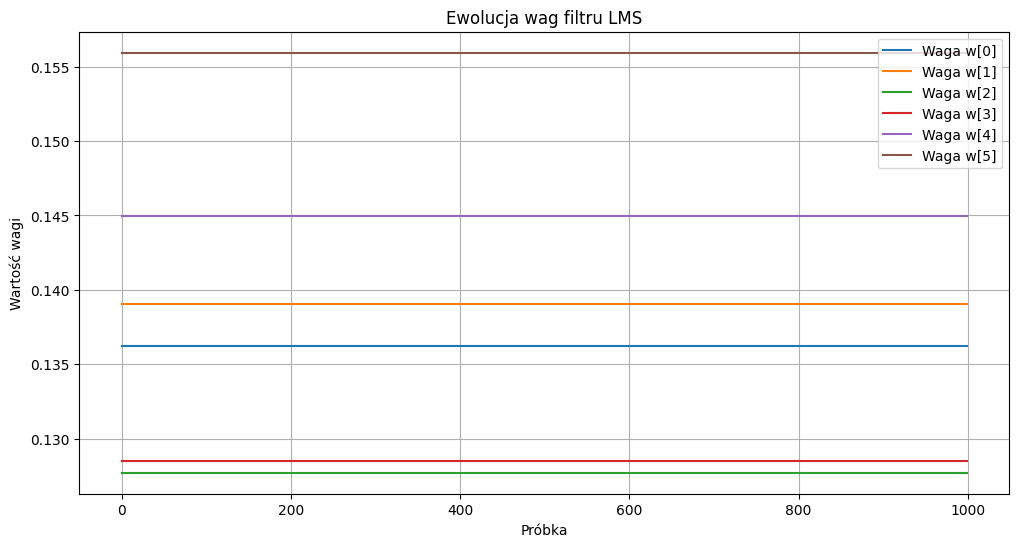

In [42]:
plt.figure(figsize=(12, 6))
for i in range(num_taps):
    plt.plot(weights_lms[i] * np.ones(len(t)), label=f'Waga w[{i}]')
plt.title('Ewolucja wag filtru LMS')
plt.xlabel('Próbka')
plt.ylabel('Wartość wagi')
plt.legend()
plt.grid()
plt.show()

All filters

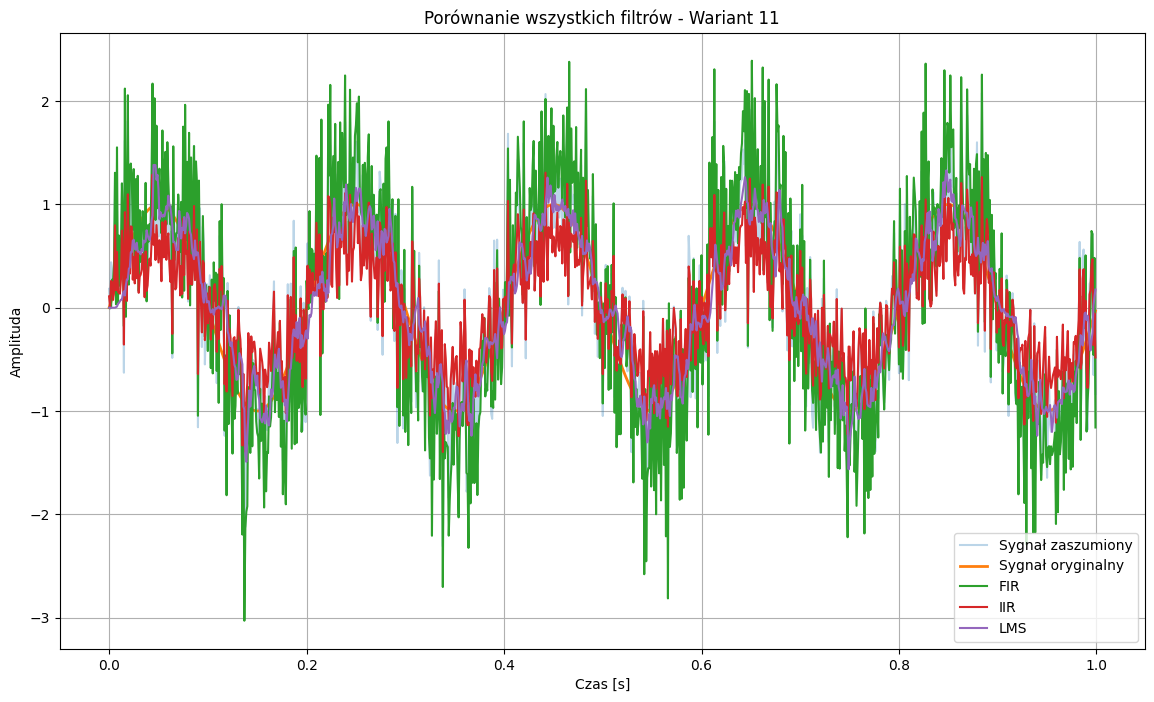

In [43]:
plt.figure(figsize=(14, 8))
plt.plot(t, signal_noisy, label='Sygnał zaszumiony', alpha=0.3)
plt.plot(t, signal_clean, label='Sygnał oryginalny', linewidth=2)
plt.plot(t, signal_fir, label='FIR', linewidth=1.5)
plt.plot(t, signal_iir, label='IIR', linewidth=1.5)
plt.plot(t, signal_lms, label='LMS', linewidth=1.5)
plt.title('Porównanie wszystkich filtrów - Wariant 11')
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda')
plt.legend()
plt.grid()
plt.show()

In [44]:
mse_fir = np.mean((signal_clean - signal_fir)**2)
mse_iir = np.mean((signal_clean - signal_iir)**2)
mse_lms = np.mean((signal_clean - signal_lms)**2)